# Setting up Kaggle API

Copy the kaggle.json from the local computer

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Oct  8 16:07 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d pknayak/news-api-scrapped-dataset

  0% 0.00/669k [00:00<?, ?B/s]
100% 669k/669k [00:00<00:00, 100MB/s]


In [ ]:
!mkdir ./data

In [ ]:
# !unzip /content/pix2code.zip -d pix2code
!unzip ./news-api-scrapped-dataset.zip -d ./data

Archive:  ./news-api-scrapped-dataset.zip
  inflating: ./data/combined_news_response.csv  


# Loading the dataset

In [ ]:
import pandas as pd

In [ ]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
data_dir = "./data/"

In [ ]:
df = pd.read_csv(data_dir+'combined_news_response.csv', sep = ',')
df.head(5)

,Unnamed: 0,title,keywords,creator,description,content,pubDate,country,category,language,file_keyword
0,0,IRS announces new plan to hire more agents for...,NaN,['Katherine Donlevy'],The federal agency said it plans to aggressive...,The IRS announced it will start targeting thou...,2023-09-10 02:15:26,['united states of america'],['top'],english,Earnings Reports
1,1,American teen Gauff wins US Open for first major,NaN,NaN,"Coco Gauff, 19, is the youngest US Open winner...",NEW YORK -- Coco Gauff won her first major tit...,2023-09-10 02:10:45,"['india', 'singapore', 'canada', 'australia', ...",['sports'],english,Earnings Reports
2,2,How to watch UFC 293: Adesanya vs. Strickland ...,NaN,['Quentyn Kennemer'],NaN,"When you buy through our links, Insider may ea...",2023-09-10 00:00:01,['united states of america'],['top'],english,Earnings Reports
3,3,Report: Which Utah university gives the best b...,NaN,['Marjorie Cortez'],NaN,A new Utah Foundation report affirms the more ...,2023-09-10 00:00:00,['united states of america'],['sports'],english,Earnings Reports
4,4,American tennis star Coco Gauff wins Grand Sla...,"['In The Know', 'News', 'tennis', 'US Open']",['Julia Shapero'],American tennis star Coco Gauff won the Grand ...,American tennis star Coco Gauff won the Grand ...,2023-09-09 23:12:08,['united states of america'],['top'],english,Earnings Reports


In [ ]:
df.columns

Index(['Unnamed: 0', 'title', 'keywords', 'creator', 'description', 'content',
       'pubDate', 'country', 'category', 'language', 'file_keyword'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['title', 'keywords', 'creator', 'description', 'content', 'pubDate',
       'country', 'category', 'language', 'file_keyword'],
      dtype='object')

In [ ]:
df['description'].isnull().sum(),df['content'].isnull().sum()

(19, 0)

In [ ]:
labelled_df = df.copy()

# Labelling the dataframe using various techniques

## 1.Using the VADER Sentiment Analysis Tool

### Sample code to check how VADER works

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Sample text
text = "I love this product! It's fantastic."

In [ ]:
# Analyze sentiment
sentiment_scores = analyzer.polarity_scores(text)


In [ ]:
# Interpret the sentiment scores
compound_score = sentiment_scores['compound']

In [ ]:
def tranform_score(compound_score):
  if compound_score >= 0.05:
      sentiment = "Positive"
  elif compound_score <= -0.05:
      sentiment = "Negative"
  else:
      sentiment = "Neutral"

  # print(f"Sentiment: {sentiment}")
  return str(sentiment)


In [ ]:
tranform_score(compound_score)

'Positive'

### VADER on the org df

In [ ]:
labelled_df.iloc[0]['content'], type(labelled_df.iloc[0]['content'])

('The IRS announced it will start targeting thousands of uber-wealthy tax cheats and make them poney up hundreds of millions of dollars in the coming months. The federal agency said it plans to aggressively hunt down 1,600 millionaires and 75 large business partnerships that routinely “cut corners” on their taxes. “If you pay your taxes on time it should be particularly frustrating when you see that wealthy filers are not,” IRS Commissioner Daniel Werfel said. Each of the millionaire tax dodgers that the IRS set its sights on owes a minimum of at least $250,000 each in back taxes, while the partnerships have assets of roughly $10 billion on average. The IRS is planning to hire an undisclosed number of revenue agents to focus on the high-end collection cases so that the new initiative can start rolling in October this year. The crackdown represents the next phase of an offensive pursuit that the Biden Administration launched earlier this summer — in July, the IRS said it collected $38 m

In [ ]:
# Sample text
text = labelled_df.iloc[0]['content']

In [ ]:
# Analyze sentiment
sentiment_scores = analyzer.polarity_scores(text)

In [ ]:
# Interpret the sentiment scores
compound_score = sentiment_scores['compound']

In [ ]:
tranform_score(compound_score)

'Positive'

In [ ]:
labelled_df['content'][:50]

In [ ]:
labelled_df.iloc[2]['content']

"When you buy through our links, Insider may earn an affiliate commission. Learn more Everyone should be excited for UFC 293's main card. It features middleweight champion Israel Adesanya defending his newly regained title against Sean Strickland, the first defense of this reign. We'll show you how to watch Adesanya vs. Strickland live streams live, no matter where you are. In addition to the middleweight championship fight, UFC is billing a heavyweight fight between Tai Tuivasa and Alexander Volkov as co-main event. There are many other fights leading up to these main events, so we'll show you how to watch UFC 293 live streams in the US, UK, and more. The main card pay-per-view livestream is exclusive to ESPN Plus members in the US, but if you're outside the country, you can tap into a few international viewing options. We'll also guide you step-by-step on how to use a VPN to watch UFC 293, no matter where you are. You might even find some of the international viewing options we've fo

In [ ]:
labelled_df.iloc[14]['content']

"Considering how markets are extremely sensitive to US data at the moment, it is best to be prepared for more potential landmines to come before we get to the next FOMC meeting later this month. In the next week, there are going to be some major economic releases and those will feed further into the Fed pricing outlook as noted . The big one to watch will be the CPI report on Wednesday but don't discount the impact of the other data releases as well, especially if there are going to be surprises along the way."

In [ ]:
labelled_df.iloc[38]['content']

'With concerns of a recession — or stock market crash — in full swing, next week’s Consumer Price Index ( CPI ) report represents perhaps the single most important economic data release ahead of the Federal Reserve’s upcoming policy decision. Indeed, the CPI report may offer insight into whether the Fed’s war on inflation is coming to a soft or emergency landing. After a surprising increase in prices in July, economists are crossing their fingers that price growth cooled in August. The headline CPI rose 3.2% on an annual basis in July, the first acceleration in more than a year. July’s hotter-than-expected inflation has stoked fears that the Fed may push the rate hike button again soon. As such, next week’s CPI report may force the Fed’s hand at its next policy meeting, Sept. 19-20. With just days between the August CPI and the FOMC meeting, the inflation data will likely prove Fed members’ final consideration before coming to a decision. And what a decision it will be. Even with fears

In [ ]:
def predict_sentiment(news_article):
    # Sample text
    text = news_article

    # Analyze sentiment
    sentiment_scores = analyzer.polarity_scores(text)

    # Interpret the sentiment scores
    compound_score = sentiment_scores['compound']

    # based on score denote the sentiment
    sentiment = tranform_score(compound_score)

    return sentiment

In [ ]:
predict_sentiment(labelled_df.iloc[38]['content'])

'Negative'

In [ ]:
for i in [2,14,38]:
  news_article = labelled_df.iloc[i]['content']
  print(f' Sentiment: "{predict_sentiment(news_article)}" for {news_article}  ')

 Sentiment: "Positive" for When you buy through our links, Insider may earn an affiliate commission. Learn more Everyone should be excited for UFC 293's main card. It features middleweight champion Israel Adesanya defending his newly regained title against Sean Strickland, the first defense of this reign. We'll show you how to watch Adesanya vs. Strickland live streams live, no matter where you are. In addition to the middleweight championship fight, UFC is billing a heavyweight fight between Tai Tuivasa and Alexander Volkov as co-main event. There are many other fights leading up to these main events, so we'll show you how to watch UFC 293 live streams in the US, UK, and more. The main card pay-per-view livestream is exclusive to ESPN Plus members in the US, but if you're outside the country, you can tap into a few international viewing options. We'll also guide you step-by-step on how to use a VPN to watch UFC 293, no matter where you are. You might even find some of the internationa

ChatGPT respones for `labelled_df.iloc[14]['content']`:
>The provided phrase seems to have a somewhat neutral tone with a hint of caution. It discusses the sensitivity of the markets to US data and the need to be prepared for potential challenges before the next FOMC meeting. It also mentions upcoming economic releases and the importance of the CPI report. Overall, it's a balanced statement with neither strongly positive nor negative sentiment.
So, it can be categorized as "Neutral."

THe second one should have been negative. If not negative atleast neutral as mentioned by ChatGPT. Any method that is giving you neutral is good enough to categorize to find the label of the data.


## 2.Using TextBlob

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def predict_sentiment_textblob(news_article):

    # Sample text
    text = news_article

    # Analyze sentiment
    analysis = TextBlob(text)

    # Interpret the sentiment
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment

In [ ]:
predict_sentiment_textblob(labelled_df.iloc[14]['content'])

'Positive'

## 3.Using a Pre-trained Model (VADER)

In [ ]:
# Example using NLTK and the VADER lexicon-based model
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# Download the VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
def predict_sentiment_nltk_vader(news_article):
    # Initialize the VADER sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Sample text
    text = news_article

    # Analyze sentiment
    sentiment_scores = analyzer.polarity_scores(text)

    # Interpret the sentiment scores
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        sentiment = "Positive"
    elif compound_score <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment

In [ ]:
predict_sentiment_nltk_vader(labelled_df.iloc[0]['content'])

'Positive'

In [ ]:
predict_sentiment_nltk_vader(labelled_df.iloc[2]['content']), \
predict_sentiment_nltk_vader(labelled_df.iloc[14]['content']), \
predict_sentiment_nltk_vader(labelled_df.iloc[38]['content'])

## Using BERT family models to create a labelled data.

* Refere to [link](https://www.notion.so/mekongdelta/MACHINE-LEARNING-COMPETITION-by-TradingGEN-4412d3cd718e41a1b4057d73b7e711d2?pvs=4#07eab6ab22024bee9dc0073f33c6ea33)
  * this is the best way to label the data because it understand the context, teh meaning behind it. others just focus on teh keywords. So focus on labelling the data using the BERT GPT models or llama.

* https://www.notion.so/mekongdelta/Sentiment-Analysis-on-News-Headlines-Classic-Supervised-Learning-vs-Deep-Learning-Approach-d67059f751c54ef1a2877017e1ac944d
  * here the snorkel technique can be used for labelling the unlabbeled dataset

* https://www.notion.so/mekongdelta/Sentiment-Analysis-on-Reddit-News-Headlines-with-Python-s-Natural-Language-Toolkit-NLTK-3c064e6937a644009c97221703748391

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.4 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

In [ ]:
# Load pre-trained BERT model and tokenizer fine-tuned for sentiment analysis
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
labelled_df.content

0      The IRS announced it will start targeting thou...
1      NEW YORK -- Coco Gauff won her first major tit...
2      When you buy through our links, Insider may ea...
3      A new Utah Foundation report affirms the more ...
4      American tennis star Coco Gauff won the Grand ...
                             ...                        
247    Growth stocks tend to be riskier than blue-chi...
248    Spoiler alert: It's supposed to look like the ...
249    Our experts answer readers' investing question...
250    Forbes Money Investing This Stock Has A 4.36% ...
251    Warner Bros. Pictures recently released a live...
Name: content, Length: 252, dtype: object

In [ ]:
articles = [
    labelled_df.iloc[2]['content'],
labelled_df.iloc[14]['content'],
labelled_df.iloc[38]['content']
]

In [ ]:
articles[2]

'With concerns of a recession — or stock market crash — in full swing, next week’s Consumer Price Index ( CPI ) report represents perhaps the single most important economic data release ahead of the Federal Reserve’s upcoming policy decision. Indeed, the CPI report may offer insight into whether the Fed’s war on inflation is coming to a soft or emergency landing. After a surprising increase in prices in July, economists are crossing their fingers that price growth cooled in August. The headline CPI rose 3.2% on an annual basis in July, the first acceleration in more than a year. July’s hotter-than-expected inflation has stoked fears that the Fed may push the rate hike button again soon. As such, next week’s CPI report may force the Fed’s hand at its next policy meeting, Sept. 19-20. With just days between the August CPI and the FOMC meeting, the inflation data will likely prove Fed members’ final consideration before coming to a decision. And what a decision it will be. Even with fears

In [ ]:
# Preprocess and tokenize the articles
inputs = tokenizer(articles, return_tensors="pt", padding=True, truncation=True)

In [ ]:
# Perform sentiment prediction
with torch.no_grad():
    outputs = model(**inputs)

In [ ]:
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[-1.1306,  0.3238],
        [-0.9421,  0.4494],
        [-1.0205,  0.4179]]), hidden_states=None, attentions=None)

In [ ]:
# Extract sentiment labels based on highest probability
predicted_labels = torch.argmax(outputs.logits, dim=1)

In [ ]:
predicted_labels

tensor([1, 1, 1])

In [ ]:
# Map labels to human-readable sentiments (e.g., 0: "negative", 1: "neutral", 2: "positive")
sentiments = ["negative", "neutral", "positive"]
predicted_sentiments = [sentiments[label] for label in predicted_labels]

In [ ]:
# Print the predicted sentiments for each article
for article, sentiment in zip(articles, predicted_sentiments):
    print(f"Predicted Sentiment: {sentiment} \n Article: {article}\n ")

Predicted Sentiment: neutral 
 Article: When you buy through our links, Insider may earn an affiliate commission. Learn more Everyone should be excited for UFC 293's main card. It features middleweight champion Israel Adesanya defending his newly regained title against Sean Strickland, the first defense of this reign. We'll show you how to watch Adesanya vs. Strickland live streams live, no matter where you are. In addition to the middleweight championship fight, UFC is billing a heavyweight fight between Tai Tuivasa and Alexander Volkov as co-main event. There are many other fights leading up to these main events, so we'll show you how to watch UFC 293 live streams in the US, UK, and more. The main card pay-per-view livestream is exclusive to ESPN Plus members in the US, but if you're outside the country, you can tap into a few international viewing options. We'll also guide you step-by-step on how to use a VPN to watch UFC 293, no matter where you are. You might even find some of the

## 5.Using models other than Bert (GPT,falcon,llama,roberta)

## Iteration 1 ( failed )

In [ ]:
import torch
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer

In [ ]:
# Define your news articles
articles = [
    labelled_df.iloc[2]['content'],
labelled_df.iloc[14]['content'],
labelled_df.iloc[38]['content']
]

In [ ]:
articles[2]

'With concerns of a recession — or stock market crash — in full swing, next week’s Consumer Price Index ( CPI ) report represents perhaps the single most important economic data release ahead of the Federal Reserve’s upcoming policy decision. Indeed, the CPI report may offer insight into whether the Fed’s war on inflation is coming to a soft or emergency landing. After a surprising increase in prices in July, economists are crossing their fingers that price growth cooled in August. The headline CPI rose 3.2% on an annual basis in July, the first acceleration in more than a year. July’s hotter-than-expected inflation has stoked fears that the Fed may push the rate hike button again soon. As such, next week’s CPI report may force the Fed’s hand at its next policy meeting, Sept. 19-20. With just days between the August CPI and the FOMC meeting, the inflation data will likely prove Fed members’ final consideration before coming to a decision. And what a decision it will be. Even with fears

In [ ]:
# Initialize models and tokenizers
models = {
    "GPT": "gpt2",
    "RoBERTa": "roberta-base",
    "LLM": "salesforce/led-base-16384",
    "Falcon": "pytorch/falcon-base",
}

In [ ]:
# Initialize results dictionary
results = {model_name: [] for model_name in models}
results

{'GPT': [], 'RoBERTa': [], 'LLM': [], 'Falcon': []}

In [ ]:
# Loop through models and analyze articles
for model_name, model_id in models.items():
    # Load the model and tokenizer
    model = AutoModelForSequenceClassification.from_pretrained(model_id)
    tokenizer = AutoTokenizer.from_pretrained(model_id)

    # Define a sentiment analysis pipeline
    sentiment_analyzer = pipeline(
        task="sentiment-analysis",
        model=model,
        tokenizer=tokenizer,
        device=0 if torch.cuda.is_available() else -1,  # Use GPU if available
    )

    # Analyze each article and store the results
    for article in articles:
        sentiment_result = sentiment_analyzer(article)
        results[model_name].append(sentiment_result)

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Token indices sequence length is longer than the specified maximum sequence length for this model (1695 > 1024). Running this sequence through the model will result in indexing errors


IndexError: ignored

In [ ]:
# Loop through models and analyze articles
for model_name, model_id in models.items():
    # Load the model and tokenizer
    model = AutoModelForSequenceClassification.from_pretrained(model_id)
    tokenizer = AutoTokenizer.from_pretrained(model_id)

    # Add a padding token to the tokenizer
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})  # You can customize the padding token as needed

    # Define a sentiment analysis pipeline
    sentiment_analyzer = pipeline(
        task="sentiment-analysis",
        model=model,
        tokenizer=tokenizer,
        device=0 if torch.cuda.is_available() else -1,  # Use GPU if available
    )

    # Analyze each article and store the results
    for article in articles:
        # Tokenize the article and split it into chunks
        tokens = tokenizer(article, padding=True, truncation=True, return_tensors="pt")

        # If the tokenized article is too long, split it into smaller chunks
        chunk_size = 512  # You can adjust this value as needed
        if len(tokens.input_ids[0]) > chunk_size:
            chunks = [
                tokens.input_ids[0][i:i + chunk_size]
                for i in range(0, len(tokens.input_ids[0]), chunk_size)
            ]
        else:
            chunks = [tokens.input_ids[0]]

        # Analyze each chunk and store the results
        chunk_results = []
        for chunk in chunks:
            chunk_text = tokenizer.decode(chunk)
            sentiment_result = sentiment_analyzer(chunk_text)
            chunk_results.append(sentiment_result)

        results[model_name].append(chunk_results)

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Token indices sequence length is longer than the specified maximum sequence length for this model (514 > 512). Running this sequence through the model will result in indexing errors


IndexError: ignored

In [ ]:
# Print the results
for model_name, model_results in results.items():
    print(f"Sentiment Analysis using {model_name}:")
    for i, article in enumerate(articles):
        sentiment = model_results[i][0]["label"]
        print(f"Article {i + 1}: {sentiment}")


## Iteration 2 - only falcon model to be used for labelling the data

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

In [ ]:
# Define your news articles
articles = [
    labelled_df.iloc[2]['content'],
labelled_df.iloc[14]['content'],
labelled_df.iloc[38]['content']
]

### Hugging face login

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# Load the Falcon model and tokenizer with the highest token limit
# model_id = "tiiuae/falcon-180B" # too big (*1*4.1 gB)model not
# model_id = "tiiuae/falcon-40b" # too big (*9*9.5 gB)model not
model_id = "tiiuae/falcon-7b"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)

The Falcon model was initialized without `trust_remote_code=True`, and will therefore leverage the transformers library implementation. tiiuae/falcon-7b's revision is set to a version that doesn't leverage remote code (4e2d06f0a7c6370ebabbc30c6f59377ae8f73d76).

In order to override this, please set a revision manually or set `trust_remote_code=True`.


`NOTE`: Air India BombingFailing due to intense usage of memory. Either use small models or check how to label the data.

In [ ]:
# Initialize a sentiment analysis pipeline
sentiment_analyzer = pipeline(
    task="sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    device=0 if torch.cuda.is_available() else -1,  # Use GPU if available
)

In [ ]:
# Analyze each article and store the results
results = []
for article in articles:
    # Tokenize the article and analyze sentiment
    sentiment_result = sentiment_analyzer(article)
    results.append(sentiment_result)

In [ ]:
# Print the results
for i, article in enumerate(articles):
    sentiment = results[i][0]["label"]
    print(f"Article {i + 1}: {sentiment}")

##  Iteration 3 - Using `cardiffnlp's` sentiment model from HF

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.8 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn.functional as F
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

In [ ]:
# Define your news articles
articles = [
    labelled_df.iloc[2]['content'], # ground_truth = positive
labelled_df.iloc[14]['content'], # gt = neutral
labelled_df.iloc[38]['content'] # gt = negative
]


In [ ]:
articles[2]

'With concerns of a recession — or stock market crash — in full swing, next week’s Consumer Price Index ( CPI ) report represents perhaps the single most important economic data release ahead of the Federal Reserve’s upcoming policy decision. Indeed, the CPI report may offer insight into whether the Fed’s war on inflation is coming to a soft or emergency landing. After a surprising increase in prices in July, economists are crossing their fingers that price growth cooled in August. The headline CPI rose 3.2% on an annual basis in July, the first acceleration in more than a year. July’s hotter-than-expected inflation has stoked fears that the Fed may push the rate hike button again soon. As such, next week’s CPI report may force the Fed’s hand at its next policy meeting, Sept. 19-20. With just days between the August CPI and the FOMC meeting, the inflation data will likely prove Fed members’ final consideration before coming to a decision. And what a decision it will be. Even with fears

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# Load the Falcon model and tokenizer with the highest token limit
model_id = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Customed Tokenizer(not working)

In [ ]:
def custom_tokenizer(input_texts):
    # Tokenize the input texts
    inputs = tokenizer(
        input_texts,
        padding="max_length",  # Customize padding strategy as needed
        truncation=True,       # Customize truncation as needed
        max_length=512,        # Set the desired maximum token length
        return_tensors="pt"
    )
    return inputs

Original customized method

```python
def custom_tokenizer(input_texts):
    # Tokenize the input texts
    inputs = tokenizer(
        input_texts,
        padding="max_length",  # Customize padding strategy as needed
        truncation=True,       # Customize truncation as needed
        max_length=512        # Set the desired maximum token length
        #return_tensors="pt",  # Return PyTorch tensors
        #The return_tensors="pt" argument should not be included in the custom tokenizer function. The pipeline will automatically handle returning PyTorch tensors. After making this change, the error should be resolved.
    )
    return inputs
```

In [ ]:
# # Use the custom_tokenizer function within the pipeline
# sentiment_analyzer = pipeline(
#     task="sentiment-analysis",
#     model=model,
#     tokenizer=custom_tokenizer,
#     device=0 if torch.cuda.is_available() else -1  # Use GPU if available
# # )
# # # Initialize a sentiment analysis pipeline
# # sentiment_analyzer = pipeline(
# #     task="sentiment-analysis",
# #     model=model,
# #     tokenizer=tokenizer,
# #     device=0 if torch.cuda.is_available() else -1,  # Use GPU if available
# # )
# # # # Initialize a sentiment analysis pipeline
# # # sentiment_analyzer = pipeline(
# # #     task="sentiment-analysis",
# # #     device=0 if torch.cuda.is_available() else -1,  # Use GPU if available
# # # )

### Using models directly

In [ ]:
tokens = tokenizer.tokenize(articles[0])
token_ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = tokenizer(articles[0])
print(tokens),print(token_ids), print(input_ids)

['When', 'Ġyou', 'Ġbuy', 'Ġthrough', 'Ġour', 'Ġlinks', ',', 'ĠInsider', 'Ġmay', 'Ġearn', 'Ġan', 'Ġaffiliate', 'Ġcommission', '.', 'ĠLearn', 'Ġmore', 'ĠEveryone', 'Ġshould', 'Ġbe', 'Ġexcited', 'Ġfor', 'ĠUFC', 'Ġ293', "'s", 'Ġmain', 'Ġcard', '.', 'ĠIt', 'Ġfeatures', 'Ġmiddle', 'weight', 'Ġchampion', 'ĠIsrael', 'ĠAd', 'es', 'anya', 'Ġdefending', 'Ġhis', 'Ġnewly', 'Ġregained', 'Ġtitle', 'Ġagainst', 'ĠSean', 'ĠStr', 'ick', 'land', ',', 'Ġthe', 'Ġfirst', 'Ġdefense', 'Ġof', 'Ġthis', 'Ġreign', '.', 'ĠWe', "'ll", 'Ġshow', 'Ġyou', 'Ġhow', 'Ġto', 'Ġwatch', 'ĠAd', 'es', 'anya', 'Ġvs', '.', 'ĠStr', 'ick', 'land', 'Ġlive', 'Ġstreams', 'Ġlive', ',', 'Ġno', 'Ġmatter', 'Ġwhere', 'Ġyou', 'Ġare', '.', 'ĠIn', 'Ġaddition', 'Ġto', 'Ġthe', 'Ġmiddle', 'weight', 'Ġchampionship', 'Ġfight', ',', 'ĠUFC', 'Ġis', 'Ġbilling', 'Ġa', 'Ġheavyweight', 'Ġfight', 'Ġbetween', 'ĠTai', 'ĠTu', 'iv', 'asa', 'Ġand', 'ĠAlexander', 'ĠVol', 'kov', 'Ġas', 'Ġco', '-', 'main', 'Ġevent', '.', 'ĠThere', 'Ġare', 'Ġmany', 'Ġother', 'Ġfig

(None, None, None)

In [ ]:
X_train = articles

In [ ]:
# # Tokenize and pad the input text
# # inputs = tokenizer(input_text, padding="max_length", truncation=True, max_length=514, return_tensors="pt")
encoded_inputs = tokenizer(X_train, padding="max_length", truncation=True, max_length=510, return_tensors="pt")

Details about the tokenization:

Source: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest/discussions/2

Remember that with RoBERTA the encoding process will add a token to the signify beg and end of a document, this is why when you truncate to 514 it adds 2 in to make tensor make 516. I would say that is this is the case it SHOULD be fixed in the config.json file. If you look at other BERT models you will see that the config.json file will have max_position_embeddings be set to 2 less than the tensor is long to account for beg and end (in this model they are 0 and 2 respective when you look at tokenized document you will see that). So to those who used max_length <= 512 that is why is worked.

In [ ]:
with torch.no_grad():
  outputs = model(**encoded_inputs)
  print(outputs)
  predictions = F.softmax(outputs.logits, dim=1)
  print(predictions)
  labels = torch.argmax(predictions, dim=1)
  print(labels)
  labels_2 = [model.config.id2label[label_id] for label_id in labels.tolist()]
  print(labels_2)

SequenceClassifierOutput(loss=None, logits=tensor([[-3.5896,  0.9367,  2.7038],
        [-1.1645,  1.3800, -0.6492],
        [-0.9798,  1.2212, -0.5866]]), hidden_states=None, attentions=None)
tensor([[0.0016, 0.1457, 0.8528],
        [0.0649, 0.8265, 0.1086],
        [0.0868, 0.7845, 0.1287]])
tensor([2, 1, 1])
['positive', 'neutral', 'neutral']


`NOTE` (next 2 days):
1. ~Don't use pipeline. Directly tokenize and send the tokens to the model directly.~
1. Try to check for other models for text classfication. Take a list of models and try to get the `article[14]` as negatice. Whichever models predicts the phrase as negative is teh best model of the all

1. use a text generation model to summarize the whole content into few words. Then pass the summarized text to the text classification model.

`IF it is not possible to get the 3rd prediction as negative from any of the model then try to take the model and move forward with any model and carry all other functions so that you will have a MVP` .
Although the prediction wouldn't be good enough.

try to do this with the cardiffnlp model above. Now move on to next steps

Inferences ;

Columns selected:
  * the content column has all the values, so take that for your analysis
  *

# Data Prepocessing

In [ ]:
expt_df = df.copy()

In [ ]:
def print_step_result(text_list_before, text_list_after, idx_list):
     # Iterating over string examples
    i = 1
    for idx in idx_list:
        print(f'--- Text {i} ---\n')
        print(f'Before: \n{text_list_before[idx]}\n')
        print(f'After: \n{text_list_after[idx]}\n')
        i += 1

## Regular Expressions

### Breakline and Carriage Return

In [ ]:
import re

In [ ]:

def re_breakline(text_list):
    return [re.sub('[\n\r]', ' ', r) for r in text_list]

In [ ]:
expt_df.columns

Index(['title', 'keywords', 'creator', 'description', 'content', 'pubDate',
       'country', 'category', 'language', 'file_keyword'],
      dtype='object')

In [ ]:
# Creating a list of comment reviews
news = list(expt_df['content'].values)

# Applying RegEx
news_breakline = re_breakline(news)
expt_df['re_breakline'] = news_breakline

In [ ]:
# Verifying results
print_step_result(news, news_breakline, idx_list=[48]) # check for a content which have "Breakline and Carriage Return" and hten check

--- Text 1 ---

Before: 
SPOILER ALERT: The story includes details about Episodes 509 ( Angel’s Peak ) and 510 ( Labor Day ) of Netflix’s series Virgin River . Part 1 of Virgin River ‘s fifth season came to a close with eventful last two episodes. In typical Virgin River fashion , there were bombshell revelations — Lizzie is pregnant, baddie Calvin is the father of Charmaine’s twins, and the big one is the cliffhanger that set up the upcoming Christmas-themed two-episode Part 2 — Mel’s biological father is likely a man from Virgin River, identity unknown (for now). Related Stories Interviews ‘Virgin River’ S5 Episodes 5 & 6 Director On Courage & Heartache Under Fire, Fictional Natural Disaster’s Eerie Real-Life Parallels And More Breaking News ‘Virgin River’ Sets Season 5 Premiere Date & Holiday Special; Trailer, Images & Logline Provide Plot Clues – Update That last shocker does stretch the limits of believability, even for a soapy romantic drama, as Mel originally landed in Virgin Ri

### Sites and Hiperlinks

In [ ]:
def re_hyperlinks(text_list):
    # Applying regex
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in text_list]

In [ ]:
# Applying RegEx
news_hyperlinks = re_hyperlinks(news_breakline)
expt_df['re_hyperlinks'] = news_hyperlinks

# Verifying results
print_step_result(news_breakline, news_hyperlinks, idx_list=[14, 47])

--- Text 1 ---

Before: 
Considering how markets are extremely sensitive to US data at the moment, it is best to be prepared for more potential landmines to come before we get to the next FOMC meeting later this month. In the next week, there are going to be some major economic releases and those will feed further into the Fed pricing outlook as noted . The big one to watch will be the CPI report on Wednesday but don't discount the impact of the other data releases as well, especially if there are going to be surprises along the way.

After: 
Considering how markets are extremely sensitive to US data at the moment, it is best to be prepared for more potential landmines to come before we get to the next FOMC meeting later this month. In the next week, there are going to be some major economic releases and those will feed further into the Fed pricing outlook as noted . The big one to watch will be the CPI report on Wednesday but don't discount the impact of the other data releases as wel

### Dates

In [ ]:
def re_dates(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """

    # Applying regex
    pattern = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}'
    return [re.sub(pattern, ' date ', r) for r in text_list]

In [ ]:
# Applying RegEx
news_dates = re_dates(news_hyperlinks)
expt_df['re_dates'] = news_dates

# Verifying results
print_step_result(news_hyperlinks, news_dates, idx_list=[3,4])

--- Text 1 ---

Before: 
A new Utah Foundation report affirms the more postsecondary education a person has, there’s a better return on investment. But the report, titled “Bang for your buck: Which Utah schools have the best return on investment,” also indicates much depends on what a student studies and the workforce demand for those credentials. The report, which examined return on investment at Utah’s public and private colleges and universities, found Weber State University is tops for students’ 10-year net present value of their education. This was calculated by how much a certain sum of money — in this case, the future earnings of additional education minus the cost of that education — would be worth today. The report shows that the first-year returns of graduates of some Weber State University associate degree programs — computer science, industrial production technologies, nursing and allied health professions — outstrip the median bachelor’s degree programs. Graduates of Weber

### Money

In [ ]:
def re_money(text_list):
    # Applying regex
    pattern = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    return [re.sub(pattern, ' paisa ', r) for r in text_list]

In [ ]:
# Applying RegEx
news_money = re_money(news_dates)
expt_df['re_money'] = news_money

# Verifying results
print_step_result(news_dates, news_money, idx_list=[2,7])

--- Text 1 ---

Before: 
When you buy through our links, Insider may earn an affiliate commission. Learn more Everyone should be excited for UFC 293's main card. It features middleweight champion Israel Adesanya defending his newly regained title against Sean Strickland, the first defense of this reign. We'll show you how to watch Adesanya vs. Strickland live streams live, no matter where you are. In addition to the middleweight championship fight, UFC is billing a heavyweight fight between Tai Tuivasa and Alexander Volkov as co-main event. There are many other fights leading up to these main events, so we'll show you how to watch UFC 293 live streams in the US, UK, and more. The main card pay-per-view livestream is exclusive to ESPN Plus members in the US, but if you're outside the country, you can tap into a few international viewing options. We'll also guide you step-by-step on how to use a VPN to watch UFC 293, no matter where you are. You might even find some of the international 

### Numbers

In [ ]:
def re_numbers(text_list):
    # Applying regex
    return [re.sub('[0-9]+', ' num ', r) for r in text_list]

In [ ]:
# Applying RegEx
news_numbers = re_numbers(news_money)
expt_df['re_numbers'] = news_numbers

# Verifying results
print_step_result(news_money, news_numbers, idx_list=[68])

--- Text 1 ---

Before: 
Most of West Maui will officially reopen to travelers Oct. 8 under a new wildfire emergency proclamation signed on Friday by Gov. Josh Green. Nonessential travel to much of the island's western coastline has been strongly discouraged since devastating wildfires killed at least 115 people in the historic town of Lahaina last month. State tourism officials initially urged travelers to stay away from Maui so residents and agencies could focus on emergency response efforts and supporting those displaced by the fires. In mid-August, officials began encouraging tourists to return to other parts of Maui, avoiding the burn zone and spending money to help the region recover. On Thursday, Green told a meeting of the state Council on Revenues that he expected authorities to reopen most of West Maui to travelers in October, with the exception of the fire-damaged neighborhoods. The area, which includes beach resorts in Kaanapali, north of historic Lahaina, has 11,000 hotel 

### Negation

In [ ]:
def re_negation(text_list):
    # Applying regex
    return [re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN] )', ' negate ', r) for r in text_list]

In [ ]:
# Applying RegEx
news_negation = re_negation(news_numbers)
expt_df['re_negation'] = news_negation

# Verifying results
print_step_result(news_numbers, news_negation, idx_list=[13,17])

--- Text 1 ---

Before: 
: ECB’s Wunsch (hawk – non voter) remains in favour of raising interest rates again: The Switzerland Q num  GDP missed expectations as the monetary tightening is starting to bite more heavily: ECB’s Lagarde (hawk – voter) is focused on the inflation expectations and keeping them in check: : Chinese Caixin Services PMI missed expectations by a big margin although remaining in expansion: The RBA left the cash rate unchanged as expected at  num . num %: ECB’s Lane (dove – voter) didn’t offer much in terms of forward guidance: The Eurozone July PPI beat expectations, but the figures were still all negative: ECB’s Schnabel (hawk – voter) touched on climate change and how it could bring downside tail risks: Fed’s Waller (hawk – voter) changed his stance and he’s now leaning towards a pause: Saudi Arabia announced that it would extend the voluntary  num  million barrels per day output cut through December and Russia quickly followed by saying it was cutting exports by

### Special Characters

In [ ]:
def re_special_chars(text_list):
    # Applying regex
    return [re.sub('\W', ' ', r) for r in text_list]

In [ ]:
# Applying RegEx
news_special_chars = re_special_chars(news_negation)
expt_df['re_special_chars'] = news_special_chars

# Verifying results
print_step_result(news_negation, news_special_chars, idx_list=[45, 135, 234])

--- Text 1 ---

Before: 
While flash floods and blizzards may be more associated with New York State when it comes to natural disasters, tornadoes can happen too. In fact, there were a reported  num  tornadoes in New York state in one day on May  num ,  num , according to . To this day, that holds the record for most tornado activity in recorded state history But we've had quite other active days for severe weather, including more recent years. A storm system in early August  num  spawned six tornadoes across the area, in almost a decade. But how likely are you getting struck by a tornado while living in New York? Where in New York are tornadoes most prevalent? The website used data from to find the counties in New York that have experienced the most tornadoes since  num . While tornadoes have been recorded for years before tha by meteorologists, forecast accuracy has greatly increased since the  num s, according to There have been three recorded F num s that have touched down in New Y

### Additional Whitespaces

In [ ]:
def re_whitespaces(text_list):
    # Applying regex
    white_spaces = [re.sub('\s+', ' ', r) for r in text_list]
    white_spaces_end = [re.sub('[ \t]+$', '', r) for r in white_spaces]
    return white_spaces_end

In [ ]:
# Applying RegEx
news_whitespaces = re_whitespaces(news_special_chars)
expt_df['re_whitespaces'] = news_whitespaces

# Verifying results
print_step_result(news_special_chars, news_whitespaces, idx_list=[3, 4, -1])

--- Text 1 ---

Before: 
A new Utah Foundation report affirms the more postsecondary education a person has  there s a better return on investment  But the report  titled  Bang for your buck  Which Utah schools have the best return on investment   also indicates much depends on what a student studies and the workforce demand for those credentials  The report  which examined return on investment at Utah s public and private colleges and universities  found Weber State University is tops for students   num  year net present value of their education  This was calculated by how much a certain sum of money   in this case  the future earnings of additional education minus the cost of that education   would be worth today  The report shows that the first year returns of graduates of some Weber State University associate degree programs   computer science  industrial production technologies  nursing and allied health professions   outstrip the median bachelor s degree programs  Graduates of We

## Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
# Get English stopwords
en_stopwords = stopwords.words('english')
print(f'Total portuguese stopwords in the nltk.corpous module: {len(en_stopwords)}')
en_stopwords[:10]

Total portuguese stopwords in the nltk.corpous module: 179


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
# Defining a function to remove the stopwords and to lower the comments
def stopwords_removal(text, cached_stopwords=stopwords.words('english')):
    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]

In [ ]:
# Removing stopwords and looking at some examples
news_stopwords = [' '.join(stopwords_removal(news)) for news in news_whitespaces]
expt_df['stopwords_removed'] = news_stopwords

print_step_result(news_whitespaces, news_stopwords, idx_list=[0, 45, 50])

--- Text 1 ---

Before: 
The IRS announced it will start targeting thousands of uber wealthy tax cheats and make them poney up hundreds of millions of dollars in the coming months The federal agency said it plans to aggressively hunt down num num millionaires and num large business partnerships that routinely cut corners on their taxes If you pay your taxes on time it should be particularly frustrating when you see that wealthy filers are not IRS Commissioner Daniel Werfel said Each of the millionaire tax dodgers that the IRS set its sights on owes a minimum of at least paisa each in back taxes while the partnerships have assets of roughly num billion on average The IRS is planning to hire an undisclosed number of revenue agents to focus on the high end collection cases so that the new initiative can start rolling in October this year The crackdown represents the next phase of an offensive pursuit that the Biden Administration launched earlier this summer in July the IRS said it collec

## Stemming

In [ ]:
from nltk.stem import RSLPStemmer

In [ ]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
def stemming_process(text, stemmer=RSLPStemmer()):
    return [stemmer.stem(c) for c in text.split()]

In [ ]:
# Applying stemming and looking at some examples
news_stemmer = [' '.join(stemming_process(news)) for news in news_stopwords]
expt_df['stemming'] = news_stemmer

print_step_result(news_stopwords, news_stemmer, idx_list=[0, 45, -1])

--- Text 1 ---

Before: 
irs announced start targeting thousands uber wealthy tax cheats make poney hundreds millions dollars coming months federal agency said plans aggressively hunt num num millionaires num large business partnerships routinely cut corners taxes pay taxes time particularly frustrating see wealthy filers irs commissioner daniel werfel said millionaire tax dodgers irs set sights owes minimum least paisa back taxes partnerships assets roughly num billion average irs planning hire undisclosed number revenue agents focus high end collection cases new initiative start rolling october year crackdown represents next phase offensive pursuit biden administration launched earlier summer july irs said collected num million delinquent taxes num high income taxpayers span months according werfel initiative propelled massive boost federal funding inflation reduction act aims generate tax revenue nation agency also added artificial intelligence tools detect tax cheating tactics migh

# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
def extract_features_from_corpus(corpus, vectorizer, df=False):

    # Extracting features
    corpus_features = vectorizer.fit_transform(corpus).toarray()
    features_names = count_vectorizer.get_feature_names_out()

    # Transforming into a dataframe to give interpetability to the process
    df_corpus_features = None
    if df:
        df_corpus_features = pd.DataFrame(corpus_features, columns=features_names)

    return corpus_features, df_corpus_features

## CountVectorizer

In [ ]:
# Creating an object for the CountVectorizer class
count_vectorizer = CountVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=en_stopwords)

In [ ]:
# Extracting features for the corpus
countv_features, df_countv_features = extract_features_from_corpus(news_stemmer, count_vectorizer, df=True)
print(f'Shape of countv_features matrix: {countv_features.shape}\n')
print(f'Example of DataFrame of corpus features:')
df_countv_features.head()

Shape of countv_features matrix: (252, 300)

Example of DataFrame of corpus features:


,acces,according,account,acros,ai,already,als,anoth,appl,arab,...,wheth,whit,without,women,work,world,would,writ,yet,yield
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,3,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,5,0,0,0,0,1,4,0,2,0,...,0,0,1,0,0,1,0,1,1,0
3,0,3,0,0,0,0,7,0,0,0,...,1,0,0,0,5,0,1,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,0,1,1,0,0,0


## TF-IDF

In [ ]:
# Creating an object for the CountVectorizer class
tfidf_vectorizer = TfidfVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=en_stopwords)

# Extracting features for the corpus
tfidf_features, df_tfidf_features = extract_features_from_corpus(news_stemmer, tfidf_vectorizer, df=True)
print(f'Shape of tfidf_features matrix: {tfidf_features.shape}\n')
print(f'Example of DataFrame of corpus features:')
df_tfidf_features.head()

Shape of tfidf_features matrix: (252, 300)

Example of DataFrame of corpus features:


,acces,according,account,acros,ai,already,als,anoth,appl,arab,...,wheth,whit,without,women,work,world,would,writ,yet,yield
0,0.0000,0.0876,0.0000,0.0000,0.0000,0.0000,0.0533,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0807,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0665,0.0000,0.0000,0.0312,0.0000,0.0000,0.0000
2,0.1931,0.0000,0.0000,0.0000,0.0000,0.0317,0.0772,0.0000,0.0911,0.0000,...,0.0000,0.0000,0.0323,0.0000,0.0000,0.0261,0.0000,0.0308,0.0344,0.0000
3,0.0000,0.0767,0.0000,0.0000,0.0000,0.0000,0.1089,0.0000,0.0000,0.0000,...,0.0281,0.0000,0.0000,0.0000,0.1227,0.0000,0.0181,0.0000,0.0000,0.0000
4,0.0000,0.1308,0.0000,0.0000,0.0000,0.0000,0.0796,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.1332,0.1968,0.0000,0.1078,0.0924,0.0000,0.0000,0.0000


- `max_features=300`: indicates that the matrix will be created using the 300 most common words from the corpus
- `max_df=0.8`: indicates that we will use only words with at least 80% frequency in the corpus
- `min_df=7`: indicates that we will use only words that occurs in at least 7 text strings in the corpus

# Labelling Data ( labelling the original data for model)

As `df` dataframe has the words in it. And as the `expt_df` is already transformed so it can be used for feature extraction.

SO use `df` for sentiment labelling of the org data.

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.7 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn.functional as F
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# Load the cardiffnlp model and tokenizer with the highest token limit
model_id = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
X_train = df['content'][14]  # articles is list of news string

In [ ]:
type(X_train), type(X_train[0])

(str, str)

In [ ]:
# # Tokenize and pad the input text
encoded_inputs = tokenizer(X_train, padding="max_length", truncation=True, max_length=510, return_tensors="pt")

In [ ]:
with torch.no_grad():
  outputs = model(**encoded_inputs)
  #print(outputs)
  predictions = F.softmax(outputs.logits, dim=1)
  #print(predictions)
  num_labels = torch.argmax(predictions, dim=1)
  print(num_labels)
  word_labels = [model.config.id2label[label_id] for label_id in num_labels.tolist()]
  print(word_labels)

tensor([1])
['neutral']


### sentiment_labelling method

In [ ]:
# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Load the cardiffnlp model and tokenizer with the highest token limit
model_id = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [ ]:
# Function to predict sentiment and return word labels
def predict_sentiment(text):
    # Tokenize and pad the input text
    encoded_inputs = tokenizer(text, padding="max_length", truncation=True, max_length=510, return_tensors="pt")
    encoded_inputs.to(device)  # Move inputs to the GPU if available

    with torch.no_grad():
        outputs = model(**encoded_inputs)
        predictions = F.softmax(outputs.logits, dim=1)
        num_labels = torch.argmax(predictions, dim=1)
        word_labels = [model.config.id2label[label_id] for label_id in num_labels.tolist()]

    return word_labels

In [ ]:
# Apply sentiment analysis to the entire 'content' column and create a new column 'sentiment'
df['sentiment'] = df['content'].apply(predict_sentiment)

In [ ]:
df['sentiment'][0][0]

'neutral'

In [ ]:
df['sentiment'] = df['sentiment'].apply(lambda x : x[0])

In [ ]:
df['sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
df['sentiment'].value_counts()

neutral     193
positive     45
negative     14
Name: sentiment, dtype: int64

In [ ]:
df.head()

,title,keywords,creator,description,content,pubDate,country,category,language,file_keyword,sentiment
0,IRS announces new plan to hire more agents for...,NaN,['Katherine Donlevy'],The federal agency said it plans to aggressive...,The IRS announced it will start targeting thou...,2023-09-10 02:15:26,['united states of america'],['top'],english,Earnings Reports,neutral
1,American teen Gauff wins US Open for first major,NaN,NaN,"Coco Gauff, 19, is the youngest US Open winner...",NEW YORK -- Coco Gauff won her first major tit...,2023-09-10 02:10:45,"['india', 'singapore', 'canada', 'australia', ...",['sports'],english,Earnings Reports,positive
2,How to watch UFC 293: Adesanya vs. Strickland ...,NaN,['Quentyn Kennemer'],NaN,"When you buy through our links, Insider may ea...",2023-09-10 00:00:01,['united states of america'],['top'],english,Earnings Reports,positive
3,Report: Which Utah university gives the best b...,NaN,['Marjorie Cortez'],NaN,A new Utah Foundation report affirms the more ...,2023-09-10 00:00:00,['united states of america'],['sports'],english,Earnings Reports,positive
4,American tennis star Coco Gauff wins Grand Sla...,"['In The Know', 'News', 'tennis', 'US Open']",['Julia Shapero'],American tennis star Coco Gauff won the Grand ...,American tennis star Coco Gauff won the Grand ...,2023-09-09 23:12:08,['united states of america'],['top'],english,Earnings Reports,positive


# Data Vizualisation (use the `df` dataframe)

As `df` dataframe has the words in it. And as the `expt_df` is already transformed so it can be used for feature extraction

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
# Data
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['lightblue', 'limegreen', 'lightcoral']


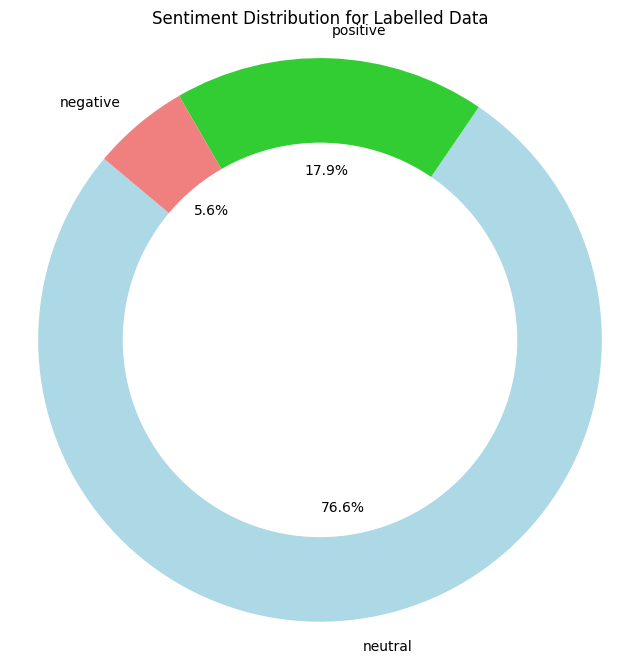

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Draw a circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Sentiment Distribution for Labelled Data')
plt.show()

## n-grams

In [ ]:
expt_df['sentiment'] = df['sentiment']

In [ ]:
expt_df.columns

Index(['title', 'keywords', 'creator', 'description', 'content', 'pubDate',
       'country', 'category', 'language', 'file_keyword', 're_breakline',
       're_hiperlinks', 're_hyperlinks', 're_dates', 're_money', 're_numbers',
       're_negation', 're_special_chars', 're_whitespaces',
       'stopwords_removed', 'stemming', 'sentiment'],
      dtype='object')

In [ ]:
def ngrams_count(corpus, ngram_range, n=-1, cached_stopwords=en_stopwords):

    # Using CountVectorizer to build a bag of words using the given corpus
    vectorizer = CountVectorizer(stop_words=cached_stopwords, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    total_list = words_freq[:n]

    # Returning a DataFrame with the ngrams count
    count_df = pd.DataFrame(total_list, columns=['ngram', 'count'])
    return count_df

In [ ]:
# Splitting the corpus into positive and negative comments
positive_comments = expt_df.query('sentiment == "positive"')['stemming']
negative_comments = expt_df.query('sentiment == "negative"')['stemming']
neutral_comments = expt_df.query('sentiment == "neutral"')['stemming']

len(positive_comments) , len(negative_comments), len(neutral_comments)

(45, 14, 193)

In [ ]:
# Extracting the top 10 unigrams by sentiment
unigrams_pos = ngrams_count(positive_comments, (1, 1), 10)
unigrams_neg = ngrams_count(negative_comments, (1, 1), 10)
unigrams_neu = ngrams_count(neutral_comments, (1, 1), 10)

# Extracting the top 10 bigrams by sentiment
bigrams_pos = ngrams_count(positive_comments, (2, 2), 10)
bigrams_neg = ngrams_count(negative_comments, (2, 2), 10)
bigrams_neu = ngrams_count(neutral_comments, (2, 2), 10)

# Extracting the top 10 trigrams by sentiment
trigrams_pos = ngrams_count(positive_comments, (3, 3), 10)
trigrams_neg = ngrams_count(negative_comments, (3, 3), 10)
trigrams_neu = ngrams_count(neutral_comments, (3, 3), 10)

In [ ]:
unigrams_neg

,ngram,count
0,num,222
1,said,108
2,earthquak,92
3,chip,79
4,ye,58
5,challeng,49
6,peopl,41
7,new,38
8,death,38
9,one,33


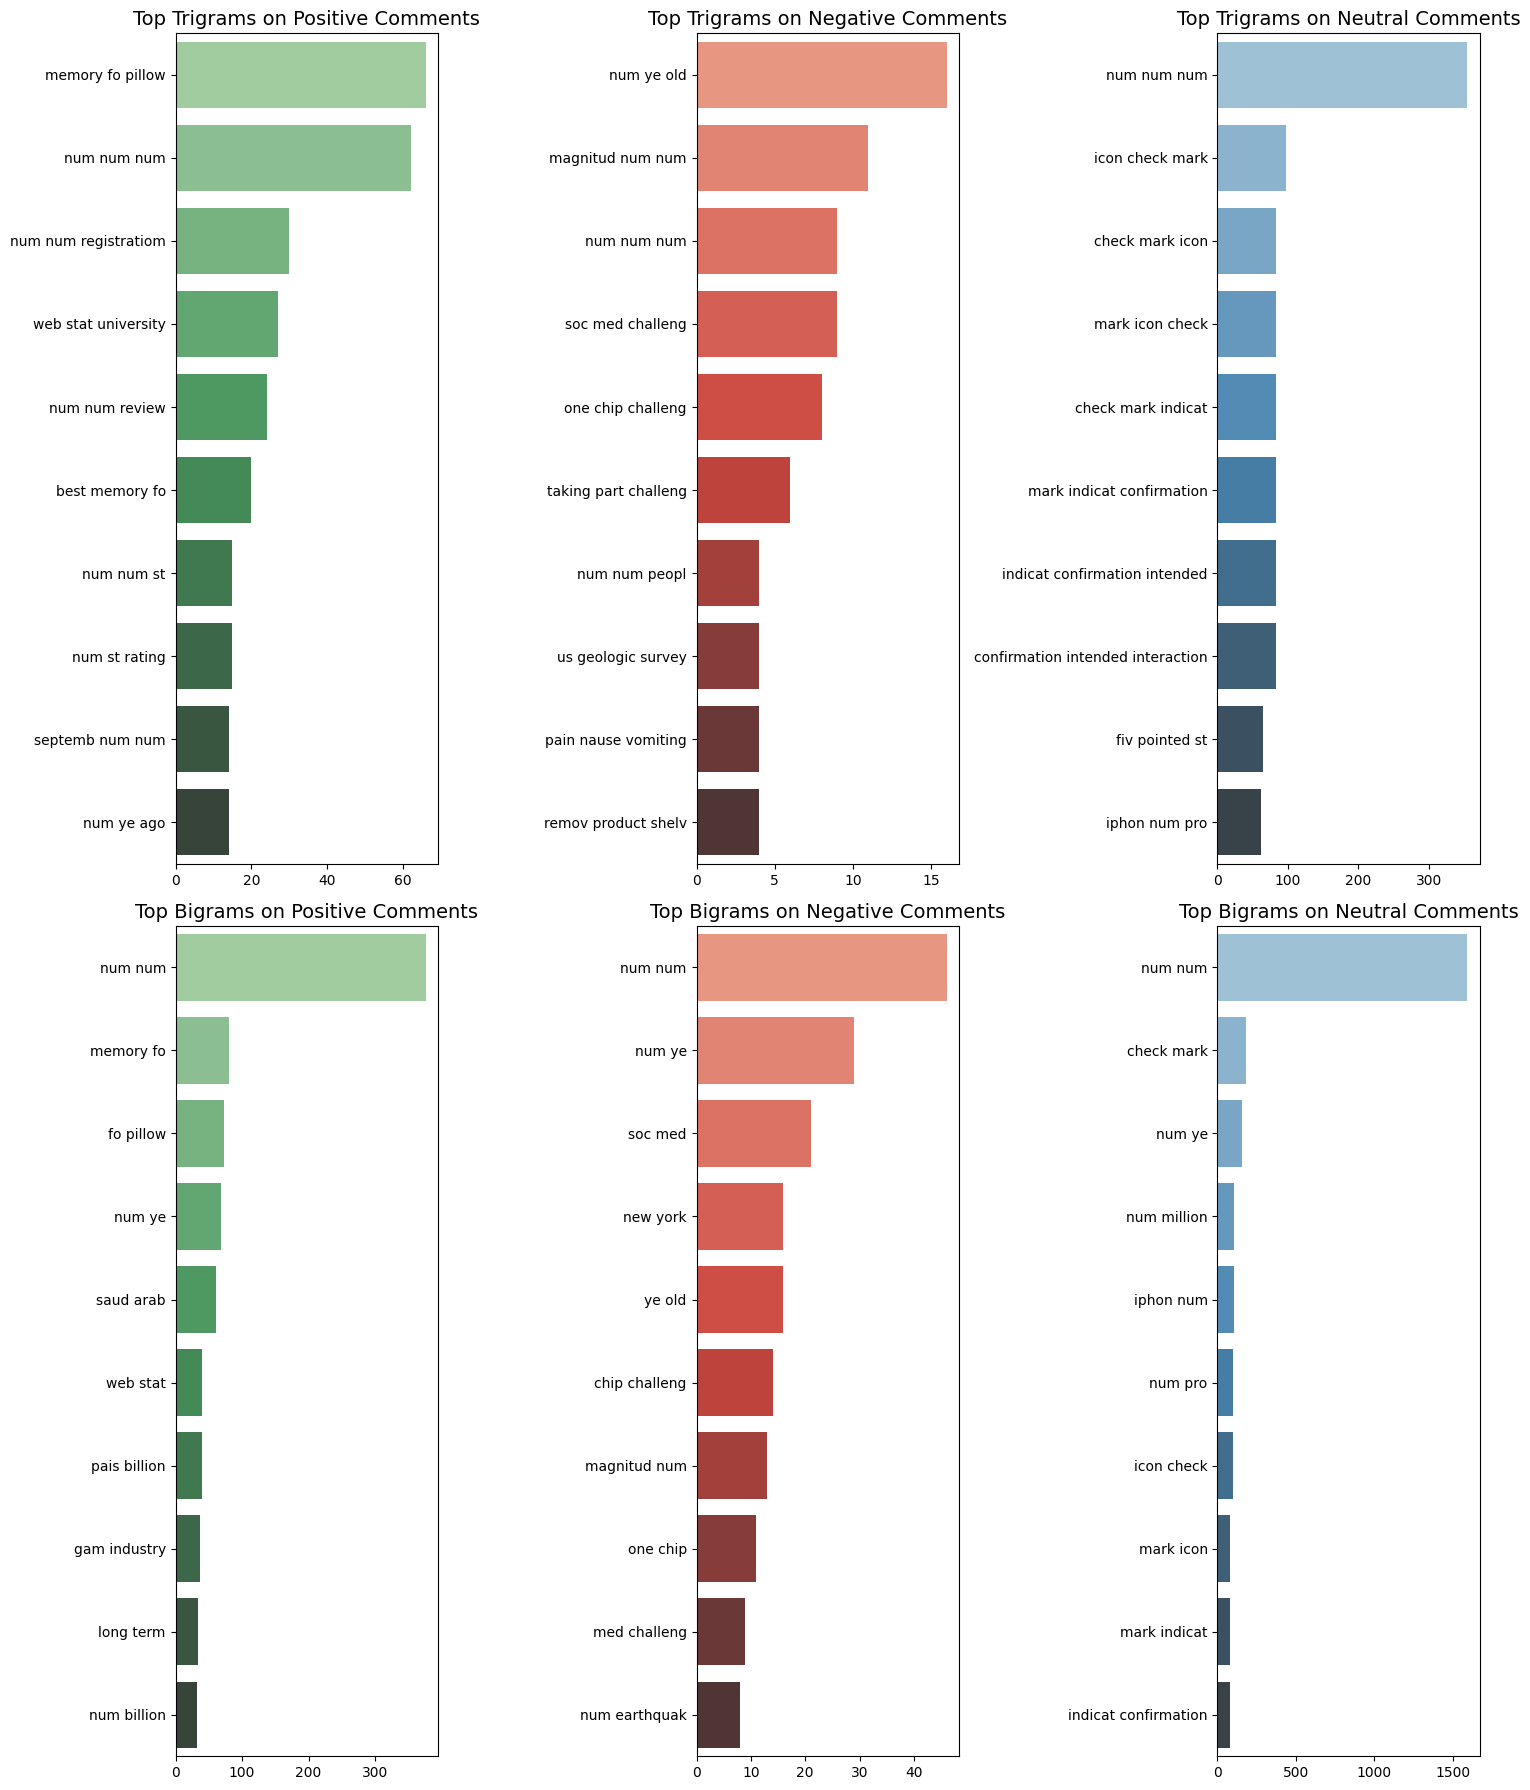

In [ ]:
# Joining everything in a python dictionary to make the plots easier
ngram_dict_plot = {
    'Top Trigrams on Positive Comments': trigrams_pos,
    'Top Trigrams on Negative Comments': trigrams_neg,
    'Top Trigrams on Neutral Comments': trigrams_neu,
    'Top Bigrams on Positive Comments': bigrams_pos,
    'Top Bigrams on Negative Comments': bigrams_neg,
    'Top Bigrams on Neutral Comments': bigrams_neu,
}

# Plotting the ngrams analysis
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 18)) # because we are trying to plot bigrams and trigrams(rows=2) and 3 sentiments(cols=3)
i, j = 0, 0
colors = ['Greens_d', 'Reds_d', 'Blues_d']
for title, ngram_data in ngram_dict_plot.items():
    ax = axs[i, j]
    sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])

    # # Customizing plots
    # format_spines(ax, right_border=False)
    ax.set_title(title, size=14)
    ax.set_ylabel('')
    ax.set_xlabel('')

    # Incrementing the index
    j += 1
    if j == 3:
        j = 0
        i += 1
plt.tight_layout()
plt.show()

# Word CLoud (on labelled Data)

In [ ]:
from wordcloud import WordCloud
from collections import Counter

In [ ]:
# Generating words
pos_news = list(expt_df.query('sentiment == "positive"')['stopwords_removed'].values)
positive_words = ' '.join(pos_news).split(' ')

In [ ]:
neg_news = list(expt_df.query('sentiment == "negative"')['stopwords_removed'].values)
negative_words = ' '.join(neg_news).split(' ')
neu_news = list(expt_df.query('sentiment == "neutral"')['stopwords_removed'].values)
neutral_words = ' '.join(neu_news).split(' ')

In [ ]:
# Using Counter for creating a dictionary counting
positive_dict = Counter(positive_words)
negative_dict = Counter(negative_words)
neutral_dict = Counter(neutral_words)

In [ ]:
# Generating wordclouds for both positive and negative comments
positive_wc = WordCloud(width=1280,
                        height=720,
                        collocations=False,
                        random_state=42,
                        # mask=transf_like_mask,
                        colormap='Blues', background_color='white',
                        max_words=50).generate_from_frequencies(positive_dict)

negative_wc = WordCloud(width=1280,
                        height=720,
                        collocations=False,
                        random_state=42,
                        # mask=transf_bomb_mask,
                        colormap='Reds',
                        background_color='white',
                        max_words=50).generate_from_frequencies(negative_dict)

neutral_wc = WordCloud(width=1280,
                        height=720,
                        collocations=False,
                        random_state=42,
                        # mask=transf_bomb_mask,
                        colormap='Greens',
                        background_color='white',
                        max_words=50).generate_from_frequencies(neutral_dict)


Text(0.5, 1.0, 'WordCloud for Neutral Words in News')

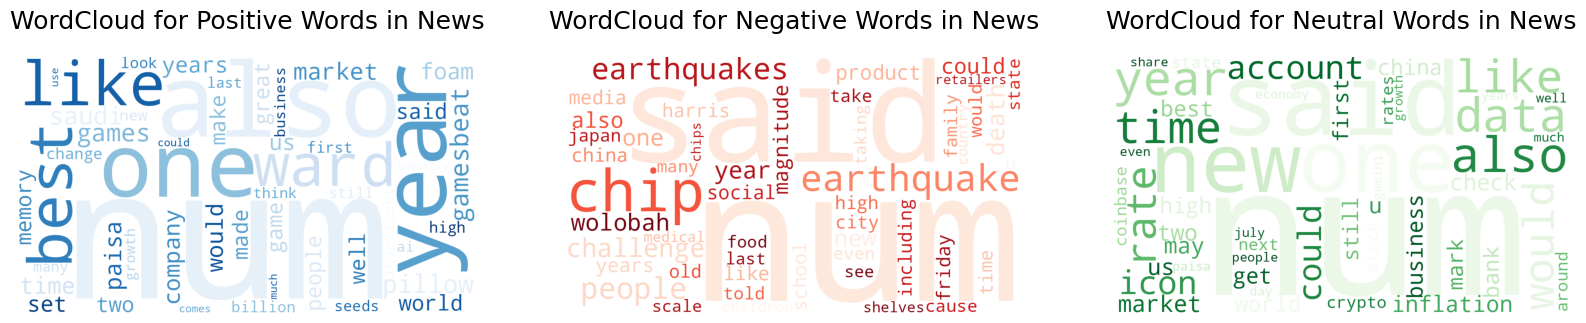

In [ ]:
# Visualizing the WC created and the total for each cuisine
fig, axs = plt.subplots(1, 3, figsize=(20, 20))
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

ax1.imshow(positive_wc)
ax1.axis('off')
ax1.set_title('WordCloud for Positive Words in News', size=18, pad=20)

ax2.imshow(negative_wc)
ax2.axis('off')
ax2.set_title('WordCloud for Negative Words in News', size=18, pad=20)

ax3.imshow(neutral_wc)
ax3.axis('off')
ax3.set_title('WordCloud for Neutral Words in News', size=18, pad=20)

* THe above are the data vizualization for the data which is labelled by the pre-trained model.
* These are the word cloud that should be created once teh sentiment is predicted for the news articles. This is just the reference and be created once the setniment is predicted.

# Model Selection and development

## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
# Class for regular expressions application
class ApplyRegex(BaseEstimator, TransformerMixin):

    def __init__(self, regex_transformers):
        self.regex_transformers = regex_transformers

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Applying all regex functions in the regex_transformers dictionary
        for regex_name, regex_function in self.regex_transformers.items():
            X = regex_function(X)

        return X

# Class for stopwords removal from the corpus
class StopWordsRemoval(BaseEstimator, TransformerMixin):

    def __init__(self, text_stopwords):
        self.text_stopwords = text_stopwords
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return [' '.join(stopwords_removal(comment, self.text_stopwords)) for comment in X]

# Class for apply the stemming process
class StemmingProcess(BaseEstimator, TransformerMixin):

    def __init__(self, stemmer):
        self.stemmer = stemmer

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return [' '.join(stemming_process(comment, self.stemmer)) for comment in X]

# Class for extracting features from corpus
class TextFeatureExtraction(BaseEstimator, TransformerMixin):

    def __init__(self, vectorizer):
        self.vectorizer = vectorizer

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return self.vectorizer.fit_transform(X).toarray()

In [ ]:
# Defining regex transformers to be applied
regex_transformers = {
    'break_line': re_breakline,
    'hiperlinks': re_hyperlinks,
    'dates': re_dates,
    'money': re_money,
    'numbers': re_numbers,
    'negation': re_negation,
    'special_chars': re_special_chars,
    'whitespaces': re_whitespaces
}


In [ ]:
# Defining the vectorizer to extract features from text
vectorizer = TfidfVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=en_stopwords)

In [ ]:
# Building the Pipeline
text_pipeline = Pipeline([
    ('regex', ApplyRegex(regex_transformers)),
    ('stopwords', StopWordsRemoval(stopwords.words('portuguese'))),
    ('stemming', StemmingProcess(RSLPStemmer())),
    ('text_features', TextFeatureExtraction(vectorizer))
])

## Defining X and y and creating the train and test

In [ ]:
df.columns

Index(['title', 'keywords', 'creator', 'description', 'content', 'pubDate',
       'country', 'category', 'language', 'file_keyword', 'sentiment'],
      dtype='object')

In [ ]:
# Define a mapping dictionary for sentiments
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}

In [ ]:
# Create a new column 'sentiment_numerical' based on the mapping
df['sentiment_numerical'] = df['sentiment'].map(sentiment_mapping)

In [ ]:
df['sentiment_numerical'].value_counts()

1    193
2     45
0     14
Name: sentiment_numerical, dtype: int64

In [ ]:
# Splitting into X and y
X = list(df['content'].values)
y = df['sentiment_numerical'].values
type(X),len(y)

(list, 252)

In [ ]:
# Applying the pipeline
X_processed = text_pipeline.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=.20, random_state=42)

In [ ]:
# Verifying results
print(f'Length of X_train_processed: {len(X_train)} - Length of one element: {len(X_train[0])}')
print(f'Length of X_test_processed: {len(X_test)} - Length of one element: {len(X_test[0])}')

Length of X_train_processed: 201 - Length of one element: 300
Length of X_test_processed: 51 - Length of one element: 300


In [ ]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.01056146,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03915918, 0.        ,
        0.        ],
       [0.        , 0.06372103, 0.081575  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.03624217, 0.        ,
        0.26258113],
       [0.        , 0.04455564, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04429578, 0.09900062,
        0.        ]])

## Sentiment CLassfication

In [ ]:
import numpy as np

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Logistic Regression hyperparameters
logreg_param_grid = {
    'C': np.linspace(0.1, 10, 20),
    'penalty': ['l1', 'l2'],
    'class_weight': [None],  # For multi-class, it's common to use None for class_weight
    'random_state': [42],
    'solver': ['liblinear']  # Different solvers for multi-class
    # 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']  # Different solvers for multi-class
}


In [ ]:
# Setting up the classifiers
set_classifiers = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': logreg_param_grid
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [ ]:
# Loop through each classifier and fit/evaluate
results = {}

In [ ]:
for clf_name, clf in set_classifiers.items():
    model = clf['model']
    params = clf['params']

    # Create the classifier with hyperparameters
    classifier = GridSearchCV(model, params, cv=5, n_jobs=-1)

    # Fit the classifier on training data
    classifier.fit(X_train, y_train)

    # Predict on test data
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate a classification report
    report = classification_report(y_test, y_pred)

    # Generate a confusion matrix
    confusion = confusion_matrix(y_test, y_pred)

    results[clf_name] = {
        'model': classifier.best_estimator_,  # Best model from GridSearchCV
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': confusion
    }

    # Save the trained model
    model_filename = f"{clf_name}_model.joblib"
    joblib.dump(classifier.best_estimator_, model_filename)

    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", confusion)
    print("\n")

Classifier: LogisticRegression
Accuracy: 0.803921568627451
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.84      0.93      0.88        41
           2       0.50      0.43      0.46         7

    accuracy                           0.80        51
   macro avg       0.45      0.45      0.45        51
weighted avg       0.75      0.80      0.77        51

Confusion Matrix:
 [[ 0  3  0]
 [ 0 38  3]
 [ 0  4  3]]


Classifier: Naive Bayes
Accuracy: 0.7843137254901961
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.90      0.85      0.88        41
           2       0.42      0.71      0.53         7

    accuracy                           0.78        51
   macro avg       0.44      0.52      0.47        51
weighted avg       0.78      0.78      0.78        51

Confusion Matrix:
 [

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# Loading the models

In [ ]:
# Load a saved model
loaded_model_lr = joblib.load("LogisticRegression_model.joblib")

In [ ]:
loaded_model_lr

LogisticRegression(C=6.352631578947369, random_state=42, solver='liblinear')

In [ ]:
# Use the loaded model for inference
loaded_predictions_lr = loaded_model_lr.predict(X_test)

In [ ]:
loaded_predictions_lr

array([2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [ ]:
loaded_prob_lr = loaded_model_lr.predict_proba(X_test)
loaded_prob_lr

array([[0.01818148, 0.30095196, 0.68086656],
       [0.02807543, 0.72771094, 0.24421363],
       [0.02555781, 0.93293105, 0.04151114],
       [0.18765712, 0.58768973, 0.22465315],
       [0.05500123, 0.82181997, 0.1231788 ],
       [0.0106144 , 0.89211839, 0.0972672 ],
       [0.05666461, 0.86332229, 0.0800131 ],
       [0.03305005, 0.90963301, 0.05731694],
       [0.02850426, 0.47013615, 0.50135959],
       [0.0135317 , 0.95844253, 0.02802577],
       [0.03645337, 0.63999285, 0.32355377],
       [0.02145668, 0.96093944, 0.01760388],
       [0.06214693, 0.8419352 , 0.09591786],
       [0.0111305 , 0.95752366, 0.03134583],
       [0.03563005, 0.89505729, 0.06931266],
       [0.0087236 , 0.96031444, 0.03096196],
       [0.02048131, 0.93656216, 0.04295653],
       [0.0087236 , 0.96031444, 0.03096196],
       [0.0087236 , 0.96031444, 0.03096196],
       [0.0260951 , 0.88653897, 0.08736593],
       [0.025266  , 0.93468835, 0.04004565],
       [0.01916804, 0.93300002, 0.04783194],
       [0.

In [ ]:
import numpy as np
# Find the maximum probability for each prediction
max_probs_lr = np.max(loaded_prob_lr, axis=1)

# Multiply the maximum probabilities by 100 to create scores
scores_lr = np.round(max_probs_lr * 100,2)

# Now 'scores_lr' contains the scores for each prediction
print(scores_lr)

[68.09 72.77 93.29 58.77 82.18 89.21 86.33 90.96 50.14 95.84 64.   96.09
 84.19 95.75 89.51 96.03 93.66 96.03 96.03 88.65 93.47 93.3  62.66 87.96
 56.94 63.93 56.44 88.39 52.02 69.35 74.11 92.   95.24 81.2  57.12 92.02
 93.5  85.8  80.87 48.53 77.26 57.55 96.03 58.36 65.05 93.3  92.5  93.12
 60.61 94.91 96.55]


In [ ]:
# Load a saved model
loaded_model_nb = joblib.load("Naive Bayes_model.joblib")

In [ ]:
# Use the loaded model for inference
loaded_predictions_nb = loaded_model_nb.predict(X_test)

In [ ]:
loaded_predictions_nb

array([2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1])

In [ ]:
# loaded_prob_nb = loaded_model_nb.predict_proba(X_test)
# loaded_prob_nb = loaded_model_nb.predict_log_proba(X_test)
loaded_prob_nb = loaded_model_nb.predict_joint_log_proba(X_test)
loaded_prob_nb

array([[-6.18815239e+09,  5.37032303e+02,  6.73705839e+02],
       [-4.00867797e+09,  4.96274747e+02, -2.78073102e+08],
       [-4.14604933e+09,  5.14787616e+02, -6.67978275e+01],
       [-2.33010371e+09,  3.38369987e+02,  4.03038062e+02],
       [-7.34054357e+09,  4.74091431e+02, -8.63656709e+07],
       [-2.90422193e+09,  5.73976375e+02, -3.95070647e+07],
       [-1.71891280e+08,  5.64235547e+02,  5.90042728e+02],
       [-4.72985011e+09,  4.43245485e+02, -4.94321649e+08],
       [-2.38712749e+08,  4.29390480e+02,  5.33165508e+02],
       [-1.32203281e+10,  3.83652061e+02, -7.19983256e+09],
       [-3.77643122e+09,  5.02667186e+02, -1.12930448e+08],
       [-4.42392841e+09,  5.52894219e+02, -2.04047170e+08],
       [-3.02514038e+08,  4.21733536e+02, -1.25455922e+09],
       [-3.08165754e+09,  4.41974131e+02, -7.53748398e+09],
       [-2.00573620e+09,  4.40308022e+02, -7.83604003e+08],
       [-1.12565479e+10,  5.13587070e+02, -3.10788580e+09],
       [-2.86333150e+08,  5.26603896e+02

In [ ]:
import numpy as np
# Find the maximum probability for each prediction
max_probs_lr = np.max(loaded_prob_lr, axis=1)

# Multiply the maximum probabilities by 100 to create scores
scores_lr = np.round(max_probs_lr * 100,2)

# Now 'scores_lr' contains the scores for each prediction
print(scores_lr)

# Evaluation on the test Dataset

In [ ]:
from sklearn.metrics import classification_report

# Calculate classification report for Logistic Regression predictions
report_lr = classification_report(y_test, loaded_predictions_lr, output_dict=True)

# Calculate classification report for Naive Bayes predictions
report_nb = classification_report(y_test, loaded_predictions_nb, output_dict=True)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
# Extract precision, recall, and F1-score values
precision_lr = report_lr['weighted avg']['precision']
recall_lr = report_lr['weighted avg']['recall']
f1_score_lr = report_lr['weighted avg']['f1-score']

In [ ]:
precision_nb = report_nb['weighted avg']['precision']
recall_nb = report_nb['weighted avg']['recall']
f1_score_nb = report_nb['weighted avg']['f1-score']

In [ ]:
# Compare the results
print("Logistic Regression:")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1-Score: {f1_score_lr}")

print("\nNaive Bayes:")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1-Score: {f1_score_nb}")

Logistic Regression:
Precision: 0.7474945533769063
Recall: 0.803921568627451
F1-Score: 0.7737907327510612

Naive Bayes:
Precision: 0.778657616892911
Recall: 0.7843137254901961
F1-Score: 0.7756707946336429


Given the close F1-Scores achieved by both models, the choice between them should be guided by the specific objectives and constraints of your application. In the domain of sentiment analysis, a high-precision model implies that when it predicts a positive sentiment, its accuracy is notably reliable. Furthermore, high recall signifies the model's effectiveness in capturing a substantial portion of actual positive sentiments.

The F1-score serves as a valuable metric as it strikes a balance between precision and recall. This balance is especially relevant when dealing with sentiment analysis tasks where class imbalances are common.

In the context of a stock market trading app, where minimizing false positives (incorrect buy signals) is paramount, the emphasis should lean towards achieving high precision. False positives can potentially lead to financial losses for users. Therefore, the model with the higher precision, even if marginally so, may be the preferable choice for this application.

In summary, since the F1-scores of both models are comparable and precision holds greater significance than recall in this scenario, the Naive Bayes model is selected as the more suitable choice.

# Gradio


For each step in the pdf, create a method for the gradio app.

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import pandas as pd
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('rslp')
from nltk.stem import RSLPStemmer

import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [ ]:
#----------------  Data Prepocessing ----------
def re_breakline(text_list):
    return [re.sub('[\n\r]', ' ', r) for r in text_list]

def re_hyperlinks(text_list):
    # Applying regex
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in text_list]

def re_dates(text_list):
    # Applying regex
    pattern = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}'
    return [re.sub(pattern, ' date ', r) for r in text_list]


def re_money(text_list):
    # Applying regex
    pattern = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    return [re.sub(pattern, ' paisa ', r) for r in text_list]

def re_numbers(text_list):
    # Applying regex
    return [re.sub('[0-9]+', ' num ', r) for r in text_list]

def re_negation(text_list):
    # Applying regex
    return [re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN] )', ' negate ', r) for r in text_list]

def re_special_chars(text_list):
    # Applying regex
    return [re.sub('\W', ' ', r) for r in text_list]
def re_whitespaces(text_list):
    # Applying regex
    white_spaces = [re.sub('\s+', ' ', r) for r in text_list]
    white_spaces_end = [re.sub('[ \t]+$', '', r) for r in white_spaces]
    return white_spaces_end

def stopwords_removal(text, cached_stopwords=stopwords.words('english')):
    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]

def stemming_process(text, stemmer=RSLPStemmer()):
    return [stemmer.stem(c) for c in text.split()]

# Class for regular expressions application
class ApplyRegex(BaseEstimator, TransformerMixin):

    def __init__(self, regex_transformers):
        self.regex_transformers = regex_transformers

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Applying all regex functions in the regex_transformers dictionary
        for regex_name, regex_function in self.regex_transformers.items():
            X = regex_function(X)

        return X

# Class for stopwords removal from the corpus
class StopWordsRemoval(BaseEstimator, TransformerMixin):

    def __init__(self, text_stopwords):
        self.text_stopwords = text_stopwords
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return [' '.join(stopwords_removal(comment, self.text_stopwords)) for comment in X]

# Class for apply the stemming process
class StemmingProcess(BaseEstimator, TransformerMixin):

    def __init__(self, stemmer):
        self.stemmer = stemmer

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return [' '.join(stemming_process(comment, self.stemmer)) for comment in X]

# Class for extracting features from corpus
class TextFeatureExtraction(BaseEstimator, TransformerMixin):

    def __init__(self, vectorizer):
        self.vectorizer = vectorizer

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return self.vectorizer.fit_transform(X).toarray()

In [ ]:
#----------------------------Creating Pipeline for Preparing the data-----
# Defining regex transformers to be applied
regex_transformers = {
    'break_line': re_breakline,
    'hiperlinks': re_hyperlinks,
    'dates': re_dates,
    'money': re_money,
    'numbers': re_numbers,
    'negation': re_negation,
    'special_chars': re_special_chars,
    'whitespaces': re_whitespaces
}

# Get English stopwords
en_stopwords = stopwords.words('english')

# Defining the vectorizer to extract features from text
vectorizer = TfidfVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=en_stopwords)

# Building the Pipeline
text_pipeline = Pipeline([
    ('regex', ApplyRegex(regex_transformers)),
    ('stopwords', StopWordsRemoval(stopwords.words('portuguese'))),
    ('stemming', StemmingProcess(RSLPStemmer())),
    ('text_features', TextFeatureExtraction(vectorizer))
])



In [ ]:
#-----------------using the trained model to predict the sentiment of the whole test set-------

def sentiment_analyzer(csv_file_name='combined_news_response.csv'):

  df = pd.read_csv(csv_file_name)
  df.drop('Unnamed: 0',axis=1,inplace=True)

  # Splitting into X and y
  X = list(df['content'].values)
  # Applying the pipeline
  X_processed = text_pipeline.fit_transform(X)

  # Load a saved model
  loaded_model_nb = joblib.load("Naive Bayes_model.joblib")

  # Use the loaded model for inference
  loaded_predictions_nb = loaded_model_nb.predict(X_processed)
  sentiments = loaded_predictions_nb

  # Sentiment mapping
  sentiment_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}

  print(f"df['content'].values ==> {len(df['content'].values)} \n sentiments length ==> {len(sentiments)}")
  # Create a DataFrame
  sentiment_df = pd.DataFrame({
      'content': df['content'].values,
      'sentiment': [sentiment_mapping[sent] for sent in sentiments]
  })

  sentiment_df.to_csv('sentiment.csv')
  print(f'Sentiment df saved as "sentiment.csv"')

  return sentiment_df


In [ ]:
#----------------the whole DATA viz with the predicted sentiment------------


## Testing only sentiment Anlayzer

In [ ]:
with gr.Blocks() as demo:
  ui_input = gr.Textbox(value='combined_news_response.csv' , visible=False)
  view_sentiment_bttn = gr.Button("Analyze Sentiment")
  df_output = gr.Dataframe(type="pandas",wrap=True)

  view_sentiment_bttn.click(sentiment_analyzer, inputs=ui_input, outputs=df_output)

In [ ]:
demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://5372556c3105de0bac.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://5372556c3105de0bac.gradio.live


In [ ]:
demo.close()

Closing server running on port: 7860


# Testing Gradio both in one

In [ ]:
# API key authorization, Initialize the client with your API key
NEWSDATA_API_KEY = "pub_2915202f68e543f70bb9aba9611735142c1fd"
keywords = [  "GDP",  "CPI",  "PPI",  "Unemployment Rate",  "Interest Rates",  "Inflation",  "Trade Balance",  "Retail Sales",  "Manufacturing Index",  "Earnings Reports",  "Revenue Growth",  "Profit Margins",  "Earnings Surprises",  "Geopolitical Events",  "Trade Tensions",  "Elections",  "Natural Disasters",  "Global Health Crises",  "Oil Prices",  "Gold Prices",  "Precious Metals",  "Agricultural Commodities",  "Federal Reserve",  "ECB",  "Forex Market",  "Exchange Rates",  "Currency Pairs",  "Tech Company Earnings",  "Tech Innovations",  "Retail Trends",  "Consumer Sentiment",  "Financial Regulations",  "Government Policies",  "Technical Analysis",  "Fundamental Analysis",  "Cryptocurrency News",  "Bitcoin",  "Altcoins",  "Cryptocurrency Regulations",  "S&P 500",  "Dow Jones",  "NASDAQ",  "Market Analysis",  "Stock Market Indices" ]
domain_dict = {'bbc': 'bbc.com', 'forbes': 'forbes.com', 'businessinsider_us': 'businessinsider.com'}

# creating a data directory
# Define the directory path you want to create
directory_path = './data'

def call_functions(domain):
  creating_data_dir(directory_path)
  items = os.listdir(directory_path)

  file_name = './combined_news_response.json'
  if len(items) == 0:
    print(f"Directory '{directory_path}' is empty.")
    api = NewsDataApiClient(apikey=NEWSDATA_API_KEY)
    retrieve_news_per_keyword(api, keywords, domain)
    combine_responses_into_one(directory_path)
    convert_json_to_csv(file_name)
  elif len(items) >= 2:
    print(f"Directory '{directory_path}' contains at least two files.")
    combine_responses_into_one(directory_path)
    convert_json_to_csv(file_name)
  else:
      print(f"Directory '{directory_path}' contains only one file.")

  # Read the combined CSV file and display the first few rows
  csv_file_name = "combined_news_response.csv"
  if os.path.exists(csv_file_name):
      df = pd.read_csv(csv_file_name)
      # Assuming df is your DataFrame
      if 'Unnamed: 0' in df.columns:
          df.drop('Unnamed: 0', axis=1, inplace=True)
      first_few_rows = df.head(10)  # Adjust the number of rows as needed
      return first_few_rows
  else:
      return f"CSV file '{csv_file_name}' not found."



In [ ]:
with gr.Blocks() as demo:
  gr.Markdown("# Welcome to News Retrieval and Sentiment Analyzer App a.k.a InfoMood Tracker")
  gr.Markdown("## Best tracker for your News around the globe ! ")
  with gr.Accordion("Steps to run the App"):
    gr.Markdown("1. Select the Domain from which you want to retrieve the news")
    gr.Markdown("2. Click on the `Retrieve news` to retrieve the news from the domain. You Should see that the result displayed in the form of Table")
    gr.Markdown("3. Click on the `Analyze Sentiment` to analyze the sentiments of the news retrieved.")
    gr.Markdown("4. ")

  with gr.Row():
    with gr.Column(scale=1, min_width=600):
      ui_domain = gr.Dropdown(["bbc", "forbes", "businessinsider_us"], label="Select Domain")
      retrieve_button = gr.Button("Retrieve news")
      df_output = gr.Dataframe(type="pandas",wrap=True,label="News retrieved from the selected domain")

      retrieve_button.click(call_functions, inputs=ui_domain, outputs=df_output)

  with gr.Row():
    with gr.Column(scale=1, min_width=600):
        ui_input = gr.Textbox(value='combined_news_response.csv' , visible=False)
        view_sentiment_bttn = gr.Button("Analyze Sentiment")
        df_output = gr.Dataframe(type="pandas",wrap=True, label="News along with Sentiment")

        view_sentiment_bttn.click(sentiment_analyzer, inputs=ui_input, outputs=df_output)


demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://c434e254b794060d78.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


df['content'].values ==> 252 
 sentiments length ==> 252
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://c434e254b794060d78.gradio.live


In [ ]:
demo.close()

Closing server running on port: 7860


In [ ]:
!pip list | grep joblib

joblib                           1.3.2


# GRadio Data Vizualization

In [ ]:
# STRATING POINT IS sentiment.csv file

In [1]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 10.2 MB/s eta 

In [2]:
import gradio as gr
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('rslp')
from nltk.stem import RSLPStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [3]:
from wordcloud import WordCloud
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

In [4]:
def get_senti_pct_distribution(expt_df):
  sentiment_counts = expt_df['sentiment'].value_counts()
  labels = sentiment_counts.index
  sizes = sentiment_counts.values
  colors = ['lightblue', 'limegreen', 'lightcoral']

  # Create a pie chart
  plt.figure(figsize=(8, 8))
  plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

  # Equal aspect ratio ensures that pie is drawn as a circle
  plt.axis('equal')
  plt.title('Sentiment Distribution for Labelled Data')
  # plt.show()

  return plt

In [5]:
# get_senti_pct_distribution(senti_csv_file_name)

In [6]:
en_stopwords = stopwords.words('english')

In [7]:
def re_breakline(text_list):
    return [re.sub('[\n\r]', ' ', r) for r in text_list]

def re_hyperlinks(text_list):
    # Applying regex
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in text_list]

def re_dates(text_list):
    # Applying regex
    pattern = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}'
    return [re.sub(pattern, ' date ', r) for r in text_list]


def re_money(text_list):
    # Applying regex
    pattern = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    return [re.sub(pattern, ' paisa ', r) for r in text_list]

def re_numbers(text_list):
    # Applying regex
    return [re.sub('[0-9]+', ' num ', r) for r in text_list]

def re_negation(text_list):
    # Applying regex
    return [re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN] )', ' negate ', r) for r in text_list]

def re_special_chars(text_list):
    # Applying regex
    return [re.sub('\W', ' ', r) for r in text_list]
def re_whitespaces(text_list):
    # Applying regex
    white_spaces = [re.sub('\s+', ' ', r) for r in text_list]
    white_spaces_end = [re.sub('[ \t]+$', '', r) for r in white_spaces]
    return white_spaces_end

def stopwords_removal(text, cached_stopwords=en_stopwords):
    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]

def stemming_process(text, stemmer=RSLPStemmer()):
    return [stemmer.stem(c) for c in text.split()]

In [8]:
def preprocessing_data(expt_df):
  # Creating a list of comment reviews
  news = list(expt_df['content'].values)

  # Applying RegEx
  news_breakline = re_breakline(news)
  expt_df['re_breakline'] = news_breakline


  # Applying RegEx
  news_hyperlinks = re_hyperlinks(news_breakline)
  expt_df['re_hyperlinks'] = news_hyperlinks


  # Applying RegEx
  news_dates = re_dates(news_hyperlinks)
  expt_df['re_dates'] = news_dates

  # Applying RegEx
  news_money = re_money(news_dates)
  expt_df['re_money'] = news_money

  # Applying RegEx
  news_numbers = re_numbers(news_money)
  expt_df['re_numbers'] = news_numbers


  # Applying RegEx
  news_negation = re_negation(news_numbers)
  expt_df['re_negation'] = news_negation

  # Applying RegEx
  news_special_chars = re_special_chars(news_negation)
  expt_df['re_special_chars'] = news_special_chars


  # Applying RegEx
  news_whitespaces = re_whitespaces(news_special_chars)
  expt_df['re_whitespaces'] = news_whitespaces


  # Removing stopwords and looking at some examples
  news_stopwords = [' '.join(stopwords_removal(news)) for news in news_whitespaces]
  expt_df['stopwords_removed'] = news_stopwords

  return expt_df

In [9]:
def generate_wc(processed_expt_df):
  # Generating words
  pos_news = list(processed_expt_df.query('sentiment == "positive"')['stopwords_removed'].values)
  positive_words = ' '.join(pos_news).split(' ')
  neg_news = list(processed_expt_df.query('sentiment == "negative"')['stopwords_removed'].values)
  negative_words = ' '.join(neg_news).split(' ')
  neu_news = list(processed_expt_df.query('sentiment == "neutral"')['stopwords_removed'].values)
  neutral_words = ' '.join(neu_news).split(' ')

  # Using Counter for creating a dictionary counting
  positive_dict = Counter(positive_words)
  negative_dict = Counter(negative_words)
  neutral_dict = Counter(neutral_words)

  # Generating wordclouds for news
  positive_wc = WordCloud(width=1280,
                          height=720,
                          collocations=False,
                          random_state=42,
                          # mask=transf_like_mask,
                          colormap='Blues', background_color='white',
                          max_words=50).generate_from_frequencies(positive_dict)

  negative_wc = WordCloud(width=1280,
                          height=720,
                          collocations=False,
                          random_state=42,
                          # mask=transf_bomb_mask,
                          colormap='Reds',
                          background_color='white',
                          max_words=50).generate_from_frequencies(negative_dict)

  neutral_wc = WordCloud(width=1280,
                          height=720,
                          collocations=False,
                          random_state=42,
                          # mask=transf_bomb_mask,
                          colormap='Greens',
                          background_color='white',
                          max_words=50).generate_from_frequencies(neutral_dict)

  return positive_wc, negative_wc, neutral_wc

In [10]:
# def plot_news_wc(positive_wc, negative_wc, neutral_wc):
#   fig, axs = plt.subplots(1, 3, figsize=(20, 20))
#   ax1 = axs[0]
#   ax2 = axs[1]
#   ax3 = axs[2]

#   ax1.imshow(positive_wc)
#   ax1.axis('off')
#   ax1.set_title('WordCloud for Positive Words in News', size=18, pad=20)

#   ax2.imshow(negative_wc)
#   ax2.axis('off')
#   ax2.set_title('WordCloud for Negative Words in News', size=18, pad=20)

#   ax3.imshow(neutral_wc)
#   ax3.axis('off')
#   ax3.set_title('WordCloud for Neutral Words in News', size=18, pad=20)

#   return fig

In [11]:
def plot_news_wc(positive_wc, negative_wc, neutral_wc):
    fig, axs = plt.subplots(3, 1, figsize=(10, 30))  # 3 rows, 1 column

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]

    ax1.imshow(positive_wc)
    ax1.axis('off')
    ax1.set_title('WordCloud for Positive Words in News', size=18, pad=20)

    ax2.imshow(negative_wc)
    ax2.axis('off')
    ax2.set_title('WordCloud for Negative Words in News', size=18, pad=20)

    ax3.imshow(neutral_wc)
    ax3.axis('off')
    ax3.set_title('WordCloud for Neutral Words in News', size=18, pad=20)

    return fig

In [12]:
def get_news_wc(expt_df):
  processed_expt_df = preprocessing_data(expt_df)
  positive_wc, negative_wc, neutral_wc = generate_wc(processed_expt_df)
  return plot_news_wc(positive_wc, negative_wc, neutral_wc)

In [13]:
def call_data_viz_func(plot_type):
  senti_csv_file_name = 'sentiment.csv'
  expt_df = pd.read_csv(senti_csv_file_name)

  if plot_type=='percentage_plot':
    return get_senti_pct_distribution(expt_df)
  elif plot_type=='word_count_plot':
    return get_news_wc(expt_df)
  else:
    raise ValueError("Unknown plot type selected")

In [16]:
with gr.Blocks() as demo:
  with gr.Row():
    with gr.Column(scale=1, min_width=600):
      ui_plot_type = gr.Radio(label="Plot type",
                              choices=["percentage_plot", "word_count_plot"],
                              value='percentage_plot')

      data_viz_bt = gr.Button("Vizualize data")

      plt_output = gr.Plot(label="Data Vizualizer for the News App", show_label=True,)
      gr.ClearButton(plt_output)
      data_viz_bt.click(call_data_viz_func, inputs=ui_plot_type, outputs=plt_output)

In [17]:
demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://0d9301cf1f6902280b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://0d9301cf1f6902280b.gradio.live


In [18]:
demo.close()

Closing server running on port: 7860


In [24]:
!pip list | grep Counter

Selected Data vizs are:
* Bar Charts and Histograms: These are simple and effective for showing sentiment distribution. Each sentiment category (positive, negative, neutral) is represented as a bar, and the height of the bar corresponds to the frequency or percentage of each sentiment in the dataset.

* Pie Charts: Pie charts can show the proportion of each sentiment class in the dataset. Each sentiment category is represented as a slice of the pie, with the size of the slice corresponding to its relative frequency

* Word Clouds: Word clouds visually display the most frequent words in a text corpus. You can create separate word clouds for positive, negative, and neutral sentiments, with word size indicating word frequency.

* Heatmaps: Heatmaps can show sentiment distribution across different categories or topics. Rows and columns represent categories or topics, and each cell's color intensity indicates the sentiment strength or frequency.

1. [HF Audio course hands on UNIT 7](https://github.com/MekongDelta-mind/hf_audio_course/blob/main/hands_on_unit_7_hf_audio.ipynb)

2. [HF Audio course hands on UNIT 1](https://github.com/MekongDelta-mind/hf_audio_course/blob/main/hf_audio_unit_1.ipynb)

3. Hugging Face models:
  * [ProsusAI/finbert](https://huggingface.co/ProsusAI/finbert)

1. [HF Senitment Analysis blog](https://huggingface.co/blog/sentiment-analysis-python#2-how-to-use-pre-trained-sentiment-analysis-models-with-python)

# Assumptions and important points to remember:

* The model used for labelling the data is not good enough to catgorize the tweets into 3 sentiments, which means that we have to fine tune the model which is trying to label the news artile or get a  sentiment labelled data from external resources.

*

# GenAI discussions

<details>
  <summary>What are the different kinds of data vizualization used for representing sentiment outputs from a sentiment anlaysis models?</summary>
  Visualizing sentiment analysis results can provide valuable insights into the sentiment distribution of a dataset. Several data visualization techniques are commonly used to represent sentiment outputs:

1. **Bar Charts and Histograms:** These are simple and effective for showing sentiment distribution. Each sentiment category (positive, negative, neutral) is represented as a bar, and the height of the bar corresponds to the frequency or percentage of each sentiment in the dataset.

2. **Pie Charts:** Pie charts can show the proportion of each sentiment class in the dataset. Each sentiment category is represented as a slice of the pie, with the size of the slice corresponding to its relative frequency.

3. **Line Charts:** Line charts can be used to visualize changes in sentiment over time, especially in time-series data. For example, you can track how sentiment towards a product or topic evolves over weeks or months.

4. **Heatmaps:** Heatmaps can show sentiment distribution across different categories or topics. Rows and columns represent categories or topics, and each cell's color intensity indicates the sentiment strength or frequency.

5. **Scatter Plots:** Scatter plots can be used when sentiment scores are continuous or have a range. Each data point represents a document or text, and the x-axis can represent one sentiment score (e.g., positive), while the y-axis represents another (e.g., negative).

6. **Word Clouds:** Word clouds visually display the most frequent words in a text corpus. You can create separate word clouds for positive, negative, and neutral sentiments, with word size indicating word frequency.

7. **Stacked Bar Charts:** Stacked bar charts show the composition of sentiment within different categories or topics. Each bar is divided into segments, and each segment represents a sentiment category.

8. **Sentiment Timeline:** This type of visualization plots sentiment scores over time, showing how sentiment fluctuates. It can be useful for tracking public sentiment on social media or news articles.

9. **Box Plots and Violin Plots:** These plots show the distribution of sentiment scores, including measures such as median, quartiles, and outliers. They are particularly useful for comparing sentiment across different groups or categories.

10. **Chord Diagrams:** Chord diagrams represent relationships between sentiment categories or topics. The thickness of the chords connecting categories indicates the strength of the relationship.

11. **Network Graphs:** Network graphs can be used to visualize co-occurrence relationships between words or entities within different sentiment categories. Nodes represent words or entities, and edges represent co-occurrence relationships.

12. **Geospatial Maps:** If sentiment analysis is applied to data with geographical information, you can visualize sentiment distribution on maps. Different regions or countries can be colored based on the predominant sentiment.

The choice of visualization depends on the nature of your data, the research questions you want to answer, and the audience you want to communicate with. Often, a combination of these visualization types can provide a comprehensive view of sentiment analysis results.
</details>